In [21]:
from transformers import pipeline

In [22]:
emotion = pipeline('sentiment-analysis', model='arpanghoshal/EmoRoBERTa')

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at arpanghoshal/EmoRoBERTa.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


In [23]:
import pandas as pd
large_text = pd.read_csv('https://github.com/abishekarun/Text-Emotion-Classification/blob/master/text_emotion.csv?raw=true')

In [24]:
large_text = large_text[:100]

In [25]:
large_text['content'][1:10].apply(emotion)


1    [{'label': 'neutral', 'score': 0.9288994073867...
2      [{'label': 'joy', 'score': 0.7030642628669739}]
3      [{'label': 'joy', 'score': 0.5057836174964905}]
4    [{'label': 'desire', 'score': 0.80342680215835...
5    [{'label': 'neutral', 'score': 0.9537404775619...
6    [{'label': 'neutral', 'score': 0.3837691247463...
7    [{'label': 'approval', 'score': 0.636143803596...
8     [{'label': 'love', 'score': 0.9831995964050293}]
9    [{'label': 'remorse', 'score': 0.4822772443294...
Name: content, dtype: object

In [26]:
def get_emotion_label(text):
  return(emotion(text)[0]['label'])

In [28]:
large_text['content'][1:10].apply(get_emotion_label)

1     neutral
2         joy
3         joy
4      desire
5     neutral
6     neutral
7    approval
8        love
9     remorse
Name: content, dtype: object

In [29]:
large_text['emotion'] = large_text['content'].apply(get_emotion_label)


In [30]:
large_text

,tweet_id,sentiment,author,content,emotion
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...,neutral
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...,neutral
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...,joy
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!,joy
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...,desire
...,...,...,...,...,...
95,1956989514,sadness,yellowduckx,@sweeetnspicy hiii im on my ipod...i cant fall...,neutral
96,1956989526,sadness,KaKuBby,dont wanna work 11-830 tomorrow but i get paid,disapproval
97,1956989560,sadness,benchidol,feels sad coz i wasnt able to play with the gu...,sadness
98,1956989561,neutral,outrAjusCharmer,PrinceCharming,neutral


Text(0.5, 1.0, 'Emotion Distribution')

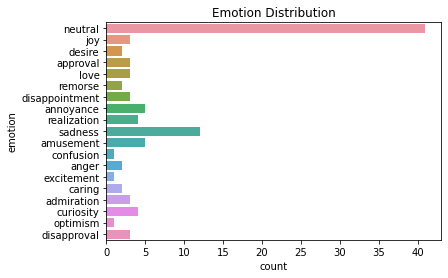

In [31]:
import seaborn as sns
sns.countplot(data = large_text, y = 'emotion').set_title("Emotion Distribution")